In [120]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

city_data = city_data.drop_duplicates("city")


# Combine the data into a single dataset
combined_data = pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
combined_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

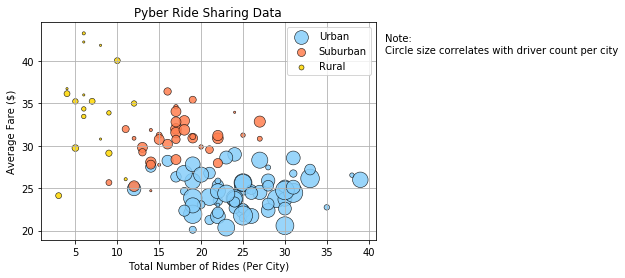

In [70]:
# Obtain the x and y coordinates for each of the three city types
by_city = combined_data.groupby("city")
#total rides by city
total_rides_city = by_city["ride_id"].count()

#average fare by city
avg_fare_city = by_city["fare"].mean()
avg_fare_city = np.round(avg_fare_city, decimals=2)

#number of drivers per city
drivers_city = by_city["driver_count"].mean()

#type of city
city_type = city_data.set_index("city")["type"]

#data frame
city_df = pd.DataFrame({
    "Type of City":city_type,
    "Total Rides":total_rides_city,
    "Average Fare":avg_fare_city,
    "Number of Drivers":drivers_city
})

#find data per city type
urban_info = city_df.loc[city_df["Type of City"]=="Urban"]
suburban_info = city_df.loc[city_df["Type of City"]=="Suburban"]
rural_info = city_df.loc[city_df["Type of City"]=="Rural"]

# Build the scatter plots for each city types
#use alpha, linewidth, edge color
#size ('s') has to be based on number of drivers
#x = number of rides per city, y = average fare per city
#add note that says "Circle size correlates with driver count per city"
plt.scatter(urban_info["Total Rides"], urban_info["Average Fare"], s=urban_info["Number of Drivers"]*5, 
            c="lightskyblue", label="Urban", edgecolor="black", alpha=0.85, linewidth=0.6)
plt.scatter(suburban_info["Total Rides"], suburban_info["Average Fare"], s=suburban_info["Number of Drivers"]*5,
            c="coral", label="Suburban", edgecolor="black", alpha=0.85, linewidth=0.6)
plt.scatter(rural_info["Total Rides"], rural_info["Average Fare"], s=rural_info["Number of Drivers"]*5,
            c="gold", label="Rural", edgecolor="black", alpha=0.85, linewidth=0.6)


# Incorporate the other graph properties
plt.grid()
plt.legend(loc="best")
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Incorporate a text label regarding circle size
note = "Note:\nCircle size correlates with driver count per city"
plt.text(42, 41, note)

# Save Figure
plt.savefig("BubblePlot.png")


In [69]:
# Show plot
plt.show()

## Total Fares by City Type

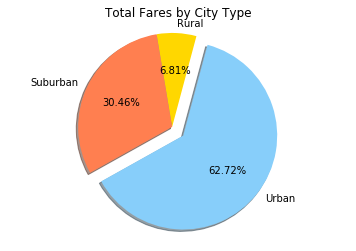

In [135]:
# Calculate Type Percents

#total fare sum per city type
city_fare = combined_data.groupby("type")["fare"].sum()

#create index list with city types to use as labels in pie chart
labels = city_fare.index

#graph stuff
colors = ["gold", "coral", "lightskyblue"]
explode = (0, 0, 0.15)

# Build Pie Chart
#use shadow, startangle, and explosion
plt.pie(city_fare, colors=colors, labels=labels, shadow=True, startangle=75, explode=explode, autopct="%1.2f%%")
plt.axis("equal")
plt.title("Total Fares by City Type")

# Save Figure
plt.savefig("PieCityFare.png")


In [128]:
# Show Figure
plt.show()

## Total Rides by City Type

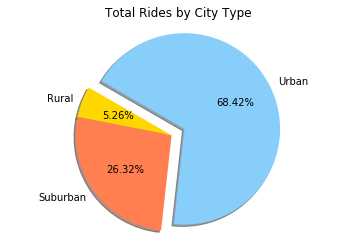

In [134]:
# Calculate Ride Percents
city_rides = combined_data.groupby("type")["ride_id"].count()

# Build Pie Chart
labels = city_rides.index
labels

#graph stuff
colors = ["gold", "coral", "lightskyblue"]
explode = (0, 0, 0.15)

# Build Pie Chart
#use shadow, startangle, and explosion
plt.pie(city_rides, colors=colors, labels=labels, shadow=True, startangle=150, explode=explode, autopct="%1.2f%%")
plt.axis("equal")
plt.title("Total Rides by City Type")
#plt.legend(labels, loc="upper left")

# Save Figure
plt.savefig("PieCityRides.png")


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

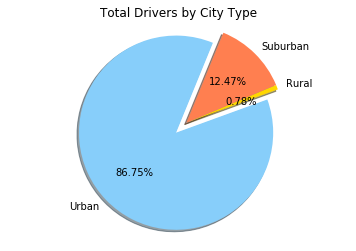

In [140]:
# Calculate Ride Percents
city_drivers = combined_data.groupby("type")["driver_count"].sum()

# Build Pie Chart
labels = city_drivers.index

#graph stuff
colors = ["gold", "coral", "lightskyblue"]
explode = (0, 0, 0.15)

# Build Pie Chart
#use shadow, startangle, and explosion
plt.pie(city_drivers, colors=colors, labels=labels, shadow=True, startangle=20, explode=explode, autopct="%1.2f%%")
plt.axis("equal")
plt.title("Total Drivers by City Type")

# Save Figure
plt.savefig("PieCityRides.png")

In [ ]:
# Show Figure
plt.show()